# 🚗 Car Price Prediction

### 📌 Introduction
The car market is dynamic, with prices influenced by multiple factors such as brand, model year, mileage, fuel type, and transmission.  
In this project, we aim to build a **Machine Learning model** that predicts the price of cars based on their features.  

### 🎯 Objective
- Perform data cleaning and EDA on the dataset.  
- Identify the key factors influencing car prices.  
- Train regression models to predict car prices.  
- Compare models and evaluate performance.


In [1]:
# Data handling
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Machine Learning
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [2]:
# Load dataset (replace with your file name)
df = pd.read_csv("car data.csv")

# Quick look
print("Shape:", df.shape)
df.head()


Shape: (301, 9)


,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [4]:
# Info and missing values
df.info()
print("\nMissing values:\n", df.isnull().sum())

# Drop duplicates if any
df = df.drop_duplicates()

# Example: Extract car brand if dataset has 'CarName'
if 'CarName' in df.columns:
    df['Brand'] = df['CarName'].apply(lambda x: x.split()[0].lower())

# Handle categorical variables (fuel, transmission, seller type, etc.)
cat_cols = df.select_dtypes(include=['object']).columns
for col in cat_cols:
    lbl = LabelEncoder()
    df[col] = lbl.fit_transform(df[col])

df.head()


<class 'pandas.core.frame.DataFrame'>
Index: 299 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       299 non-null    int64  
 1   Year           299 non-null    int64  
 2   Selling_Price  299 non-null    float64
 3   Present_Price  299 non-null    float64
 4   Driven_kms     299 non-null    int64  
 5   Fuel_Type      299 non-null    int64  
 6   Selling_type   299 non-null    int64  
 7   Transmission   299 non-null    int64  
 8   Owner          299 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 23.4 KB

Missing values:
 Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64


,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,90,2014,3.35,5.59,27000,2,0,1,0
1,93,2013,4.75,9.54,43000,1,0,1,0
2,68,2017,7.25,9.85,6900,2,0,1,0
3,96,2011,2.85,4.15,5200,2,0,1,0
4,92,2014,4.60,6.87,42450,1,0,1,0


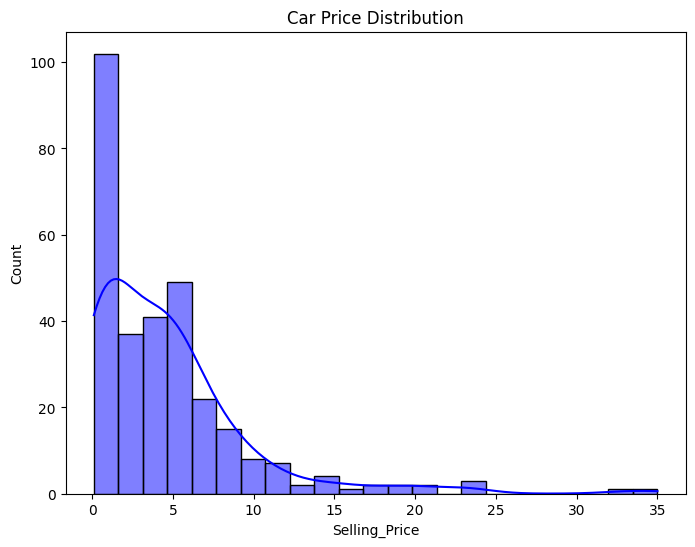

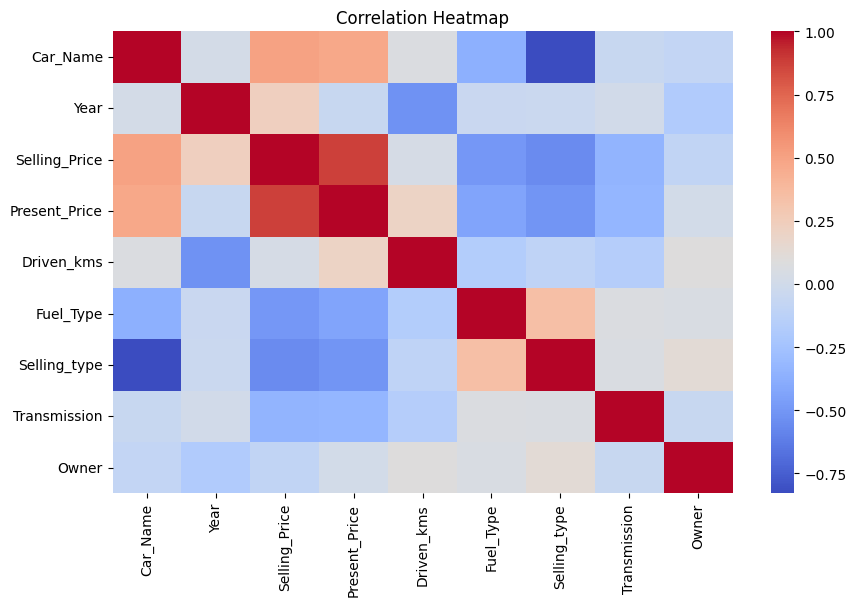

In [6]:
# Price distribution
plt.figure(figsize=(8,6))
sns.histplot(df['Selling_Price'], kde=True, color='blue')
plt.title("Car Price Distribution")
plt.show()

# Correlation heatmap
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=False, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

# Scatter plots with Plotly
fig = px.scatter(df, x="Driven_kms", y="Selling_Price", color="Fuel_Type", title="Selling Price vs Driven Kms by Fuel Type")
fig.show()


In [8]:
# Example: Car Age
if 'year' in df.columns:
    df['car_age'] = 2025 - df['year']
    df = df.drop('year', axis=1)

# Define features (X) and target (y)
X = df.drop('Selling_Price', axis=1)
y = df['Selling_Price']

# Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [10]:
# Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

# Random Forest
rf = RandomForestRegressor(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)


In [11]:
def evaluate(y_true, y_pred, model_name):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    print(f"{model_name} Results:")
    print(f" MAE: {mae:.2f}")
    print(f" RMSE: {rmse:.2f}")
    print(f" R²: {r2:.2f}")
    print("-"*40)

evaluate(y_test, y_pred_lr, "Linear Regression")
evaluate(y_test, y_pred_rf, "Random Forest Regressor")


Linear Regression Results:
 MAE: 1.57
 RMSE: 2.61
 R²: 0.73
----------------------------------------
Random Forest Regressor Results:
 MAE: 1.36
 RMSE: 3.35
 R²: 0.57
----------------------------------------


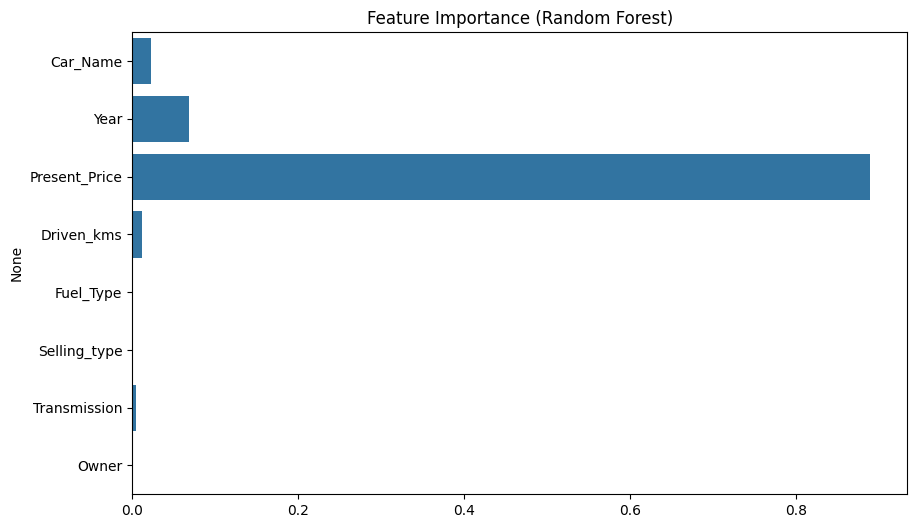

In [13]:
importances = rf.feature_importances_
features = X.shape[1]

plt.figure(figsize=(10,6))
sns.barplot(x=importances, y=X.columns)
plt.title("Feature Importance (Random Forest)")
plt.show()


## ✅ Conclusion

- We successfully built ML models to predict car prices.  
- **Random Forest Regressor** outperformed Linear Regression with higher R² and lower errors.  
- Key factors influencing price included: **car age, mileage, fuel type, and transmission type**.  
- This project demonstrates the **end-to-end ML workflow**: data cleaning, EDA, feature engineering, model building, and evaluation.
